### Import Lib

In [129]:
import numpy as np
from agent import *
import matplotlib.pyplot as plt

### Notation:

- q_star - $q_*(a)$
- The basic idea here is to generate all the randomness by numpy at once as a np.array. 
- There is a summary at the end of each part.


### Part (e)

In [141]:
num_tasks = 2000
time_steps= 1000
# Set up
k = 10

# The reason to bother to create a huge array for q_star is simply to re-use the function for Part (f).
q_star = np.random.normal(size=(num_tasks, k, 1)) + np.zeros(shape=(num_tasks, k, time_steps))
rewards = q_star + np.random.normal(size=(num_tasks, k, time_steps))
q_star.shape


(2000, 10, 1000)

In [131]:
"""
n - number of bandit
action = 0,1,2,3,4,5,6,7,8
epsilon = 0.1
Q* - The real value of action (10, 2000)
Q - The estimated value for each action (10,)
N_a - The # of action i (10,)
randomness
max_num_tasks = 2000
"""

def reward(task_num, a, time_step):
    """
    There is a random walk for each reward.
    """
    return rewards[task_num, a, time_step]

def max_q_star(task_num):

    return q_star[task_num,:,:].argmax(axis=0)
    
def run(Q_0=0, c=0, epsilon=0, agent_type='Agent', num_runs=num_tasks, num_steps=100, alpha=0.1):
    avg_reward = np.zeros(num_steps)
    prob_a_star = np.zeros(num_steps)

    for task_num in range(num_runs):  # At game run_num
        a_stars = max_q_star(task_num)

        if agent_type == 'Agent':
            agent = Agent(Q_0=Q_0, c=c, epsilon=epsilon)
        elif agent_type == 'SampleMeanAgent':
            agent = SampleMeanAgent(Q_0=Q_0, c=c, epsilon=epsilon)
        elif agent_type == 'StepSizeAgent':
            agent = StepSizeAgent(Q_0=Q_0, c=c, epsilon=epsilon)


        for time_step in range(num_steps):
            a_star = a_stars[time_step]

            a = agent.epsilon_greedy(t=time_step)
            r = reward(task_num, a, time_step)
            agent.learn(a, r, alpha=alpha)
            avg_reward[time_step] += r
            
            if a_star == a:
                prob_a_star[time_step] += 1

    avg_reward = avg_reward / num_runs
    prob_a_star = prob_a_star / num_runs

    return avg_reward, prob_a_star




In [132]:
avg_reward_0, prob_a_star_0 = run(Q_0=5, c=0, epsilon=0,
                agent_type='Agent', num_runs=num_tasks, num_steps=time_steps)


In [133]:
avg_reward_01, prob_a_star_01 = run(Q_0=0, c=2, epsilon=0.1,
                agent_type='Agent', num_runs=num_tasks, num_steps=time_steps)

c:\Users\wangt\Desktop\MLHW\Bandit\archive\agent.py:21: RuntimeWarning: invalid value encountered in true_divide
  return np.argmax(self.Q + self.c * np.sqrt(np.log(t) / self.N_a))
c:\Users\wangt\Desktop\MLHW\Bandit\archive\agent.py:21: RuntimeWarning: divide by zero encountered in true_divide
  return np.argmax(self.Q + self.c * np.sqrt(np.log(t) / self.N_a))
c:\Users\wangt\Desktop\MLHW\Bandit\archive\agent.py:21: RuntimeWarning: divide by zero encountered in log
  return np.argmax(self.Q + self.c * np.sqrt(np.log(t) / self.N_a))
c:\Users\wangt\Desktop\MLHW\Bandit\archive\agent.py:21: RuntimeWarning: invalid value encountered in sqrt
  return np.argmax(self.Q + self.c * np.sqrt(np.log(t) / self.N_a))


In [134]:
avg_reward_001, prob_a_star_001 = run(Q_0=0, c=2, epsilon=0.01,
                agent_type='Agent', num_runs=num_tasks, num_steps=time_steps)

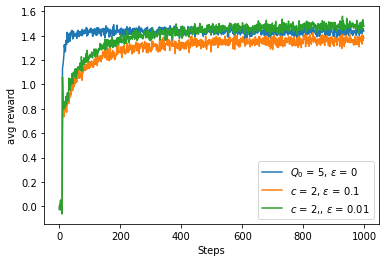

In [135]:
plt.plot(avg_reward_0, label = "$Q_0$ = 5, $\epsilon$ = 0")
plt.plot(avg_reward_01, label = "$c$ = 2, $\epsilon$ = 0.1")
plt.plot(avg_reward_001, label = "$c$ = 2,, $\epsilon$ = 0.01")
plt.xlabel('Steps')
plt.ylabel('avg reward')
plt.legend()


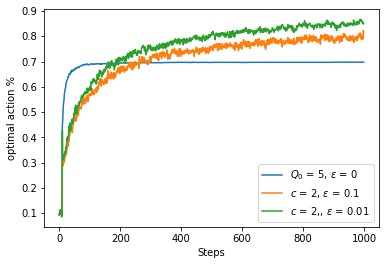

In [136]:
plt.plot(prob_a_star_0, label = "$Q_0$ = 5, $\epsilon$ = 0")
plt.plot(prob_a_star_01, label = "$c$ = 2, $\epsilon$ = 0.1")
plt.plot(prob_a_star_001, label = "$c$ = 2,, $\epsilon$ = 0.01")
plt.xlabel('Steps')
plt.ylabel('optimal action %')
plt.legend()


#### Summary:
- An optimistic initial value encourages action to be explored. Hence it out-performance the other algorithms at the first few steps.
- However, it is still systematically worse than the 'actively' explore algorithms (i.e., $\epsilon$-greedy with u=2) in this specifical model. Note that UCB also encourages exloration at the begining.

### (f)

In [124]:
num_tasks = 2000
time_steps= 10_000
# Set up
k = 10

q_star = np.random.normal(scale=0.01, size=(num_tasks, k, time_steps)).cumsum(axis=2)
rewards = q_star
q_star.shape


(2000, 10, 10000)

In [125]:
avg_reward_increment, prob_a_star_increment = run(Q_0=0, c=0, epsilon=0.1, 
            agent_type='Agent', num_runs=num_tasks, num_steps=time_steps)


In [126]:
avg_reward_step_size, prob_a_star_step_size = run(Q_0=0, c=0, epsilon=0.1, 
            agent_type='StepSizeAgent', num_runs=num_tasks, num_steps=time_steps)


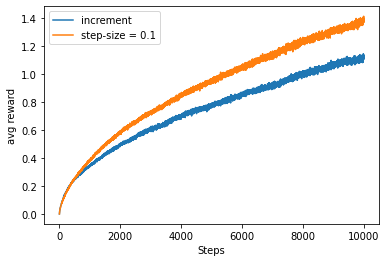

In [127]:
# plt.plot(avg_reward_sample_mean, label = "sample_mean")
plt.plot(avg_reward_increment, label = "increment")
plt.plot(avg_reward_step_size, label = "step-size = 0.1")
plt.xlabel('Steps')
plt.ylabel('avg reward')
plt.legend()


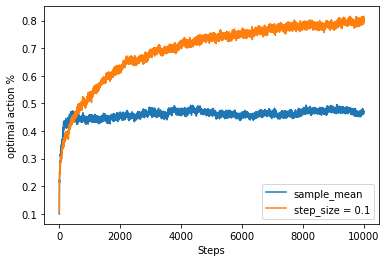

In [137]:
# plt.plot(prob_a_star_sample_mean, label = "sample_mean")
plt.plot(prob_a_star_increment, label = "sample_mean")
plt.plot(prob_a_star_step_size, label = "step_size = 0.1")
plt.xlabel('Steps')
plt.ylabel('optimal action %')
plt.legend()


#### Summary:
- In this model, step-sie = 0.1 performs better than sample-mean method, as it values the recent rewards more than the historical ones. This is important in this specific scenario as the rewards of each action following a random walk with the same initial value 0. This implies that the player should dynamically optimize the action based on his/her obeservation of the recent rewards, while the historical ones tends to be less informative. 